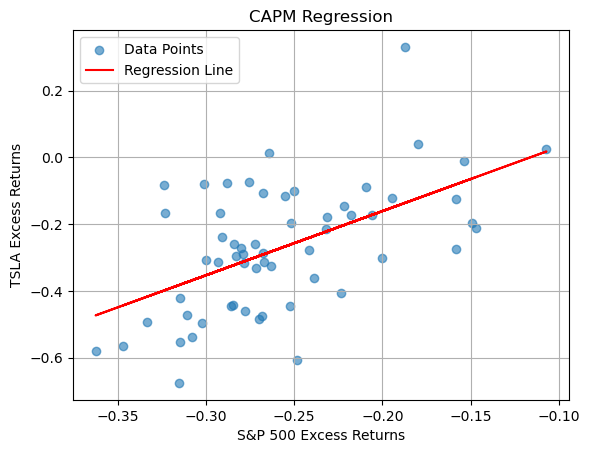

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the data from CSV files
sp500_data = pd.read_csv('sp500.csv')
tsla_data = pd.read_csv('TSLA.csv')

# Calculate daily returns
sp500_data['Returns'] = sp500_data['Adj Close**'].pct_change()
tsla_data['Returns'] = tsla_data['Adj Close**'].pct_change()

# Merge the two dataframes based on the 'Date' column
merged_data = pd.merge(tsla_data[['Date', 'Returns']], sp500_data[['Date', 'Returns']], on='Date', suffixes=('_TSLA', '_SP500'))

# Calculate the excess returns (stock return - risk-free rate)
risk_free_rate = 3 / 12  # Assuming 3% annual risk-free rate, converted to daily
merged_data['Excess_Return_TSLA'] = merged_data['Returns_TSLA'] - risk_free_rate
merged_data['Excess_Return_SP500'] = merged_data['Returns_SP500'] - risk_free_rate

# Perform linear regression to estimate beta
slope, intercept, r_value, p_value, std_err = stats.linregress(
    merged_data['Excess_Return_SP500'].dropna(),
    merged_data['Excess_Return_TSLA'].dropna()
)


# Create a scatter plot with regression line
plt.scatter(merged_data['Excess_Return_SP500'], merged_data['Excess_Return_TSLA'], alpha=0.6, label='Data Points')
plt.plot(merged_data['Excess_Return_SP500'], intercept + slope * merged_data['Excess_Return_SP500'], 'r', label='Regression Line')
plt.xlabel('S&P 500 Excess Returns')
plt.ylabel('TSLA Excess Returns')
plt.title('CAPM Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [2]:
# Round the intercept to 4 decimal places
rounded_intercept = round(intercept, 4)

# Print the regression information with the rounded intercept
print("Regression Information:")
print(f"Estimated Beta (slope): {slope:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error: {std_err:.4f}")


Regression Information:
Estimated Beta (slope): 1.9214
R-squared: 0.3000
P-value: 0.0000
Standard Error: 0.3887


In [3]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the entire contents of tsla_data
print("TSLA Data:")
print(tsla_data)

# Print the entire contents of sp500_data
print("\nS&P 500 Data:")
print(sp500_data)

# Reset display options to default (optional)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


TSLA Data:
          Date    Open    High     Low  Close*  Adj Close**      Volume  \
0   01/09/2023  257.26  259.08  242.01  245.01       245.01   132272500   
1   01/08/2023  266.26  266.47  212.36  258.08       258.08  2501580900   
2   01/07/2023  276.49  299.29  254.12  267.43       267.43  2392089000   
3   01/06/2023  202.59  276.99  199.37  261.77       261.77  3440477900   
4   01/05/2023  163.17  204.48  158.83  203.93       203.93  2681994800   
5   01/04/2023  199.91  202.69  152.37  164.31       164.31  2505176300   
6   01/03/2023  206.21  207.79  163.91  207.46       207.46  3311619900   
7   01/02/2023  173.89  217.65  169.93  205.71       205.71  3624845100   
8   01/01/2023  118.47  180.68  101.81  173.22       173.22  3897499400   
9   01/12/2022  197.08  198.92  108.24  123.18       123.18  2944247700   
10  01/11/2022  234.05  237.40  166.19  194.70       194.70  1885275300   
11  01/10/2022  254.50  257.50  198.59  227.54       227.54  1735263100   
12  01/09/2022

In [4]:
from docx import Document
from docx.enum.table import WD_ALIGN_VERTICAL
from docx.shared import Pt
from docx.oxml import OxmlElement

# Create a new Word document
doc = Document()

# Add a title to the document
doc.add_heading('Comparison of Berlin and London in Terms of Innovation Ecosystem', level=1).alignment = 1

# Create a table with 3 rows and 3 columns
num_rows = 4
num_cols = 6
table = doc.add_table(rows=num_rows, cols=num_cols)

# Set the column widths
table.autofit = False
for i, width in enumerate([1, 2, 1, 2, 1, 2]):
    table.columns[i].width = width * Pt(1)

# Merge cells in the first row to create a header
cell = table.cell(0, 0)
cell.merge(table.cell(0, 1))
cell.merge(table.cell(0, 2))
cell.text = 'Indicator'

cell = table.cell(0, 3)
cell.merge(table.cell(0, 4))
cell.merge(table.cell(0, 5))
cell.text = 'Berlin'

# Populate the table with data
data = [
    ['Popularity Score', 'Global Connectivity', 'Brand Visibility', 'Foreign Founders', 'Expansion Destination', 'Female Founders'],
    ['99/100', '100/100', '100/100', '100/100', '100/100', '78/100'],
    ['100/100', '100/100', '100/100', '91/100', '74/100', '67/100'],
    ['1st Rank', '2nd Rank', '1st Rank', '6th Rank', '4th Rank', '29th Rank']
]

for i, row_data in enumerate(data):
    row = table.rows[i+1].cells
    for j, text in enumerate(row_data):
        cell = row[j]
        cell.text = text

# Add a qualitative summary
doc.add_heading('Qualitative Summary:', level=2)
summary = doc.add_paragraph()
summary.add_run("Berlin and London are both thriving innovation ecosystems with their own strengths and weaknesses. While London holds the top rank in terms of Popularity Score, Global Connectivity, Brand Visibility, and Investment metrics, Berlin follows closely behind. Berlin excels in Foreign Founders, Expansion Destination, and Developer Availability.")
summary.alignment = 0

# Save the document
doc.save('Berlin_London_Innovation_Comparison.docx')


IndexError: list index out of range

In [ ]:
from docx import Document
from docx.enum.table import WD_ALIGN_VERTICAL
from docx.shared import Pt
from docx.oxml import OxmlElement

# Create a new Word document
doc = Document()

# Add a title to the document
doc.add_heading('Comparison of Berlin and London in Terms of Innovation Ecosystem', level=1).alignment = 1

# Create a table with 4 rows and 6 columns
num_rows = 4
num_cols = 6
table = doc.add_table(rows=num_rows, cols=num_cols)

# Set the column widths
table.autofit = False
for i, width in enumerate([1, 2, 1, 2, 1, 2]):
    table.columns[i].width = width * Pt(1)

# Merge cells in the first row to create a header
cell = table.cell(0, 0)
cell.merge(table.cell(0, 1))
cell.merge(table.cell(0, 2))
cell.text = 'Indicator'

cell = table.cell(0, 3)
cell.merge(table.cell(0, 4))
cell.merge(table.cell(0, 5))
cell.text = 'Berlin'

# Populate the table with data
data = [
    ['Popularity Score', 'Global Connectivity', 'Brand Visibility', 'Foreign Founders', 'Expansion Destination', 'Female Founders'],
    ['99/100', '100/100', '100/100', '100/100', '100/100', '78/100'],
    ['100/100', '100/100', '100/100', '91/100', '74/100', '67/100'],
    ['1st Rank', '2nd Rank', '1st Rank', '6th Rank', '4th Rank', '29th Rank']
]

for i, row_data in enumerate(data):
    row = table.rows[i+1].cells
    for j, text in enumerate(row_data):
        cell = row[j]
        cell.text = text

# Add a qualitative summary
doc.add_heading('Qualitative Summary:', level=2)
summary = doc.add_paragraph()
summary.add_run("Berlin and London are both thriving innovation ecosystems with their own strengths and weaknesses. While London holds the top rank in terms of Popularity Score, Global Connectivity, Brand Visibility, and Investment metrics, Berlin follows closely behind. Berlin excels in Foreign Founders, Expansion Destination, and Developer Availability.")
summary.alignment = 0

# Save the document
doc.save('Berlin_London_Innovation_Comparison.docx')


In [ ]:
import matplotlib.pyplot as plt

# Data for London and Berlin
categories = [
    "Popularity Score", "Popularity Growth", "Global Connectivity", "Brand Visibility",
    "Foreign Founders", "Expansion Destination", "Female Founders", "Developer Availability",
    "Industry Connections", "Investment Raised", "Investment Growth", "Exits",
    "Value for Money", "Jobs Creation", "Purpose Orientation", "Ease of Doing Business",
    "Entrepreneurial Universities"
]

london_scores = [99, 27, 100, 100, 100, 100, 78, 100, 84, 100, 43, 100, 51, 100, 0, 79, 100]
berlin_scores = [100, 100, 100, 100, 91, 74, 67, 93, 74, 100, 26, 100, 72, 100, 0, 68, 39]

ranks_london = [1, 10, 1, 1, 4, 1, 19, 1, 12, 1, 26, 1, 51, 1, 0, 18, 1]
ranks_berlin = [2, None, 2, 1, 6, 4, 29, 5, 26, 3, 38, 4, 28, 2, None, 32, 17]  # Fill None with 0 or another suitable value

# Create subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot London scores and ranks
ax1.barh(categories, london_scores, color='royalblue', label='London Scores')
ax1.barh(categories, berlin_scores, color='tomato', label='Berlin Scores', left=london_scores)
ax1.set_xlabel('Scores')
ax1.set_title('London vs. Berlin Tech Ecosystem Scores')
ax1.legend(loc='upper right', fontsize='small')

# Create a second y-axis for ranks
ax2 = ax1.twiny()
ax2.barh(categories, ranks_london, color='royalblue', alpha=0.3, label='London Ranks')
ax2.barh(categories, ranks_berlin, color='tomato', alpha=0.3, label='Berlin Ranks', left=ranks_london)
ax2.set_xlabel('Ranks')
ax2.legend(loc='upper left', fontsize='small')

# Adjust layout
plt.tight_layout()
plt.gca().invert_yaxis()  # Reverse the y-axis to show the highest scores at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Data for London and Berlin
categories_london = [
    "Popularity Score", "Popularity Growth", "Global Connectivity", "Brand Visibility",
    "Foreign Founders", "Expansion Destination", "Female Founders", "Developer Availability",
    "Industry Connections", "Investment Raised", "Investment Growth", "Exits",
    "Value for Money", "Jobs Creation", "Ease of Doing Business",
    "Entrepreneurial Universities"
]

categories_berlin = [
    "Popularity Score", "Global Connectivity", "Brand Visibility",
    "Foreign Founders", "Expansion Destination", "Female Founders", "Developer Availability",
    "Industry Connections", "Investment Raised", "Investment Growth", "Exits",
    "Value for Money", "Jobs Creation", "Ease of Doing Business",
    "Entrepreneurial Universities"
]

london_scores = [99, 27, 100, 100, 100, 100, 78, 100, 84, 100, 43, 100, 51, 100, 79, 100]
london_ranks = [1, 10, 1, 1, 4, 1, 19, 1, 12, 1, 26, 1, 51, 1, 18, 1]

berlin_scores = [100, 100, 100, 100, 91, 74, 67, 93, 74, 100, 26, 100, 72, 100, 68, 39]
berlin_ranks = [2, 2, 1, 6, 4, 29, 5, 26, 3, 38, 4, 28, 2, 32, 17]

# Filter categories that are not shared
shared_categories = [category for category in categories_london if category in categories_berlin]

# Filter data based on shared categories
london_scores_filtered = [london_scores[i] for i, category in enumerate(categories_london) if category in shared_categories]
london_ranks_filtered = [london_ranks[i] for i, category in enumerate(categories_london) if category in shared_categories]
berlin_scores_filtered = [berlin_scores[i] for i, category in enumerate(categories_berlin) if category in shared_categories]
berlin_ranks_filtered = [berlin_ranks[i] for i, category in enumerate(categories_berlin) if category in shared_categories]

# Create figure and subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Bar width
bar_width = 0.35
index = np.arange(len(shared_categories))

# Plot London scores and ranks
bar1 = ax.bar(index - bar_width / 2, london_scores_filtered, bar_width, alpha=0.8, color='royalblue', label='London Scores')
bar2 = ax.bar(index + bar_width / 2, berlin_scores_filtered, bar_width, alpha=0.8, color='tomato', label='Berlin Scores')

ax.set_xlabel('Categories')
ax.set_ylabel('Scores')
ax.set_title('Scores by Category - London vs. Berlin')
ax.set_xticks(index)
ax.set_xticklabels(shared_categories, rotation=90)
ax.legend()

# Create a second y-axis for ranks
ax2 = ax.twinx()
bar3 = ax2.bar(index - bar_width / 2, london_ranks_filtered, bar_width, alpha=0.3, color='navy', label='London Ranks')
bar4 = ax2.bar(index + bar_width / 2, berlin_ranks_filtered, bar_width, alpha=0.3, color='darkred', label='Berlin Ranks')

ax2.set_ylabel('Ranks')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for London and Berlin
categories_london = [
    "Popularity Score", "Popularity Growth", "Global Connectivity", "Brand Visibility",
    "Foreign Founders", "Expansion Destination", "Female Founders", "Developer Availability",
    "Industry Connections", "Investment Raised", "Investment Growth", "Exits",
    "Value for Money", "Jobs Creation", "Ease of Doing Business",
    "Entrepreneurial Universities"
]

categories_berlin = [
    "Popularity Score", "Global Connectivity", "Brand Visibility",
    "Foreign Founders", "Expansion Destination", "Female Founders", "Developer Availability",
    "Industry Connections", "Investment Raised", "Investment Growth", "Exits",
    "Value for Money", "Jobs Creation", "Ease of Doing Business",
    "Entrepreneurial Universities"
]

london_scores = [99, 27, 100, 100, 100, 100, 78, 100, 84, 100, 43, 100, 51, 100, 79, 100]
london_ranks = [1, 10, 1, 1, 4, 1, 19, 1, 12, 1, 26, 1, 51, 1, 18, 1]

berlin_scores = [100, 100, 100, 100, 91, 74, 67, 93, 74, 100, 26, 100, 72, 100, 68, 39]
berlin_ranks = [2, 2, 1, 6, 4, 29, 5, 26, 3, 38, 4, 28, 2, 32, 17]

# Filter categories that are not shared
shared_categories = [category for category in categories_london if category in categories_berlin]

# Filter data based on shared categories
london_scores_filtered = [london_scores[i] for i, category in enumerate(categories_london) if category in shared_categories]
london_ranks_filtered = [london_ranks[i] for i, category in enumerate(categories_london) if category in shared_categories]
berlin_scores_filtered = [berlin_scores[i] for i, category in enumerate(categories_berlin) if category in shared_categories]
berlin_ranks_filtered = [berlin_ranks[i] for i, category in enumerate(categories_berlin) if category in shared_categories]

# Sort data based on London scores in descending order
sorted_indices = np.argsort(london_scores_filtered)[::-1]
london_scores_sorted = [london_scores_filtered[i] for i in sorted_indices]
london_ranks_sorted = [london_ranks_filtered[i] for i in sorted_indices]
berlin_scores_sorted = [berlin_scores_filtered[i] for i in sorted_indices]
berlin_ranks_sorted = [berlin_ranks_filtered[i] for i in sorted_indices]
sorted_categories = [shared_categories[i] for i in sorted_indices]

# Create figure and subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Bar width
bar_width = 0.35
index = np.arange(len(sorted_categories))

# Plot London scores and ranks
bar1 = ax.bar(index - bar_width / 2, london_scores_sorted, bar_width, alpha=0.8, color='royalblue', label='London Scores')
bar2 = ax.bar(index + bar_width / 2, berlin_scores_sorted, bar_width, alpha=0.8, color='tomato', label='Berlin Scores')

ax.set_xlabel('Categories')
ax.set_ylabel('Scores')
ax.set_title('Scores by Category - London vs. Berlin (Sorted by London Scores)')
ax.set_xticks(index)
ax.set_xticklabels(sorted_categories, rotation=90)
ax.legend()

# Create a second y-axis for ranks
ax2 = ax.twinx()
bar3 = ax2.bar(index - bar_width / 2, london_ranks_sorted, bar_width, alpha=0.3, color='navy', label='London Ranks')
bar4 = ax2.bar(index + bar_width / 2, berlin_ranks_sorted, bar_width, alpha=0.3, color='darkred', label='Berlin Ranks')

ax2.set_ylabel('Ranks')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for London and Berlin
categories_london = [
    "Popularity Score", "Popularity Growth", "Global Connectivity", "Brand Visibility",
    "Foreign Founders", "Expansion Destination", "Female Founders", "Developer Availability",
    "Industry Connections", "Investment Raised", "Investment Growth", "Exits",
    "Value for Money", "Jobs Creation", "Ease of Doing Business",
    "Entrepreneurial Universities"
]

categories_berlin = [
    "Popularity Score", "Global Connectivity", "Brand Visibility",
    "Foreign Founders", "Expansion Destination", "Female Founders", "Developer Availability",
    "Industry Connections", "Investment Raised", "Investment Growth", "Exits",
    "Value for Money", "Jobs Creation", "Ease of Doing Business",
    "Entrepreneurial Universities"
]

london_scores = [99, 27, 100, 100, 100, 100, 78, 100, 84, 100, 43, 100, 51, 100, 79, 100]
london_ranks = [1, 10, 1, 1, 4, 1, 19, 1, 12, 1, 26, 1, 51, 1, 18, 1]

berlin_scores = [100, 100, 100, 100, 91, 74, 67, 93, 74, 100, 26, 100, 72, 100, 68, 39]
berlin_ranks = [2, 2, 1, 6, 4, 29, 5, 26, 3, 38, 4, 28, 2, 32, 17]

# Filter categories that are not shared
shared_categories = [category for category in categories_london if category in categories_berlin]

# Filter data based on shared categories
london_scores_filtered = [london_scores[i] for i, category in enumerate(categories_london) if category in shared_categories]
london_ranks_filtered = [london_ranks[i] for i, category in enumerate(categories_london) if category in shared_categories]
berlin_scores_filtered = [berlin_scores[i] for i, category in enumerate(categories_berlin) if category in shared_categories]
berlin_ranks_filtered = [berlin_ranks[i] for i, category in enumerate(categories_berlin) if category in shared_categories]
sorted_categories = [shared_categories[i] for i in range(len(shared_categories))]

# Sort data based on London scores and ranks in descending order
sorted_indices_scores = np.argsort(london_scores_filtered)[::-1]
sorted_indices_ranks = np.argsort(london_ranks_filtered)[::-1]
london_scores_sorted = [london_scores_filtered[i] for i in sorted_indices_scores]
london_ranks_sorted = [london_ranks_filtered[i] for i in sorted_indices_ranks]
berlin_scores_sorted = [berlin_scores_filtered[i] for i in sorted_indices_scores]
berlin_ranks_sorted = [berlin_ranks_filtered[i] for i in sorted_indices_ranks]

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Bar width
bar_width = 0.35
index = np.arange(len(sorted_categories))

# Plot London scores and Berlin scores
bar1 = ax1.bar(index, london_scores_sorted, bar_width, alpha=0.8, color='royalblue', label='London Scores')
bar2 = ax1.bar(index + bar_width, berlin_scores_sorted, bar_width, alpha=0.8, color='tomato', label='Berlin Scores')

ax1.set_xlabel('Categories')
ax1.set_ylabel('Scores')
ax1.set_title('Scores by Category - London vs. Berlin (Sorted in Descending Order)')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(sorted_categories, rotation=90)
ax1.legend()

# Plot London ranks and Berlin ranks
bar3 = ax2.bar(index, london_ranks_sorted, bar_width, alpha=0.8, color='royalblue', label='London Ranks')
bar4 = ax2.bar(index + bar_width, berlin_ranks_sorted, bar_width, alpha=0.8, color='tomato', label='Berlin Ranks')

ax2.set_xlabel('Categories')
ax2.set_ylabel('Ranks')
ax2.set_title('Ranks by Category - London vs. Berlin (Sorted in Descending Order)')
ax2.set_xticks(index + bar_width / 2)
ax2.set_xticklabels(sorted_categories, rotation=90)
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Data for London and Berlin
categories_london = [
    "Popularity Score", "Popularity Growth", "Global Connect", "Brand Visibility",
    "Foreign Founders", "Expansion Dest", "Female Founders", "Dev Avail",
    "Industry Connections", "Investment Raised", "Investment Growth", "Exits",
    "Value for Money", "Jobs Creation", "Ease of Doing Business",
    "Entrep Universities"
]

categories_berlin = [
    "Popularity Score", "Global Connect", "Brand Visibility",
    "Foreign Founders", "Expansion Dest", "Female Founders", "Dev Avail",
    "Industry Connections", "Investment Raised", "Investment Growth", "Exits",
    "Value for Money", "Jobs Creation", "Ease of Doing Business",
    "Entrep Universities"
]

london_scores = [99, 27, 100, 100, 100, 100, 78, 100, 84, 100, 43, 100, 51, 100, 79, 100]
london_ranks = [1, 10, 1, 1, 4, 1, 19, 1, 12, 1, 26, 1, 51, 1, 18, 1]

berlin_scores = [100, 100, 100, 100, 91, 74, 67, 93, 74, 100, 26, 100, 72, 100, 68, 39]
berlin_ranks = [2, 2, 1, 6, 4, 29, 5, 26, 3, 38, 4, 28, 2, 32, 17]

# Filter categories that are not shared
shared_categories = [category for category in categories_london if category in categories_berlin]

# Filter data based on shared categories
london_scores_filtered = [london_scores[i] for i, category in enumerate(categories_london) if category in shared_categories]
london_ranks_filtered = [london_ranks[i] for i, category in enumerate(categories_london) if category in shared_categories]
berlin_scores_filtered = [berlin_scores[i] for i, category in enumerate(categories_berlin) if category in shared_categories]
berlin_ranks_filtered = [berlin_ranks[i] for i, category in enumerate(categories_berlin) if category in shared_categories]

# Create a scatter plot with improved zoom and larger size
plt.figure(figsize=(12, 8))
plt.scatter(london_scores_filtered, london_ranks_filtered, label='London', color='royalblue', alpha=0.8)
plt.scatter(berlin_scores_filtered, berlin_ranks_filtered, label='Berlin', color='tomato', alpha=0.8)

plt.xlabel('Scores')
plt.ylabel('Ranks')
plt.title('Relationship between Scores and Ranks - London vs. Berlin')
plt.legend()
plt.grid(True)

# Add labels for data points with adjusted placement
for i, category in enumerate(shared_categories):
    if i % 2 == 0:
        plt.annotate(category, (london_scores_filtered[i], london_ranks_filtered[i]), fontsize=8, ha='right', va='bottom')
        plt.annotate(category, (berlin_scores_filtered[i], berlin_ranks_filtered[i]), fontsize=8, ha='left', va='top')
    else:
        plt.annotate(category, (london_scores_filtered[i], london_ranks_filtered[i]), fontsize=8, ha='left', va='bottom')
        plt.annotate(category, (berlin_scores_filtered[i], berlin_ranks_filtered[i]), fontsize=8, ha='right', va='top')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

data = {
    'House': range(1, 21),
    'Heating Cost': [250, 360, 165, 43, 92, 200, 355, 290, 230, 120, 73, 205, 400, 320, 72, 272, 94, 190, 235, 139],
    'Minimum Temperature': [35, 29, 36, 60, 65, 30, 10, 7, 21, 55, 54, 48, 20, 39, 60, 20, 58, 40, 27, 30],
    'Insulation': [3, 4, 7, 6, 5, 5, 6, 10, 9, 2, 12, 5, 5, 4, 8, 5, 7, 8, 9, 7],
    'Age': [6, 10, 3, 9, 6, 5, 7, 10, 11, 5, 4, 1, 15, 7, 6, 8, 3, 11, 8, 5],
    'Windows': [10, 1, 9, 8, 8, 9, 14, 9, 11, 9, 11, 10, 12, 10, 8, 10, 10, 11, 14, 9]
}

# Create a DataFrame
df = pd.DataFrame(data)



In [ ]:
import pandas as pd

# Calculate the correlation coefficient
correlation = df['Heating Cost'].corr(df['Minimum Temperature'])

# Interpret the correlation coefficient
if correlation > 0:
    interpretation = "There is a positive correlation."
elif correlation < 0:
    interpretation = "There is a negative correlation."
else:
    interpretation = "There is no significant correlation."

print(f"Correlation coefficient: {correlation:.2f}")
print(f"Interpretation: {interpretation}")


In [ ]:
import pandas as pd

# Calculate the correlation coefficient
correlation = df['Minimum Temperature'].corr(df['Age'])

# Interpret the correlation coefficient
if correlation > 0:
    interpretation = "There is a positive correlation."
elif correlation < 0:
    interpretation = "There is a negative correlation."
else:
    interpretation = "There is no significant correlation."

print(f"Correlation coefficient: {correlation:.2f}")
print(f"Interpretation: {interpretation}")

In [ ]:
import pandas as pd

# Replace with the actual path to your Excel file
file_path = '/Users/matiasgroblunecke/IronhackLab/Various-ESMT/HeatingCost.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Now, you can work with the DataFrame 'df' containing your Excel data
print(df.head())  # Display the first few rows of the DataFrame


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


In [ ]:
file_path = '/Users/matiasgroblunecke/IronhackLab/Various-ESMT/stock_data.xlsx'

data = pd.read_excel(file_path)

In [ ]:
# Select the relevant columns for the analysis
X = data['Excess return over 3% S&P 500']
Y = data['Excess return over 3% TSLA']

# Add a constant to the independent variable (S&P 500 returns)
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(Y, X).fit()

# Get the summary of the regression analysis
print(model.summary())

# Extract the beta coefficient
beta_tsla = model.params['Excess return over 3% S&P 500']

print(f'Beta for TSLA: {beta_tsla}')

The regression analysis results indicate that the excess return of TSLA is positively and significantly related to the excess return of the S&P 500. The R-squared value of 0.304 suggests that approximately 30.4% of the variability in TSLA's excess returns can be explained by changes in the S&P 500's excess returns, indicating a moderate degree of correlation between the two variables. The coefficient for the S&P 500 excess return is 2.2655, signifying that for each unit increase in the S&P 500's excess return, TSLA's excess return is expected to increase by approximately 2.27 units. The p-value of 0.000 for the S&P 500 coefficient suggests that this relationship is statistically significant. Additionally, the constant term (0.0774) is the intercept, representing TSLA's excess return when the S&P 500's excess return is zero. Overall, the model suggests that TSLA's returns are positively influenced by movements in the broader market, as represented by the S&P 500, with a beta of 2.27, indicating that TSLA is expected to be more volatile than the market.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have loaded your data into 'data' DataFrame
X = data['Excess return over 3% S&P 500']
Y = data['Excess return over 3% TSLA']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.7, c='blue', label='Data Points')

# Add labels and a title
plt.xlabel('Excess return over 3% S&P 500')
plt.ylabel('Excess return over 3% TSLA')
plt.title('Scatter Plot of TSLA Excess Returns vs. S&P 500 Excess Returns')

# Fit a regression line
slope, intercept = np.polyfit(X, Y, 1)
plt.plot(X, slope*X + intercept, color='red', linewidth=2, label='Regression Line')

# Show a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


TypeError: list indices must be integers or slices, not str

In [ ]:
file_path = '/Users/matiasgroblunecke/IronhackLab/Various-ESMT/stock_data.xlsx'

data = pd.read_excel(file_path)

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load your dataset
file_path = '/Users/matiasgroblunecke/IronhackLab/Various-ESMT/Newspapers data .xlsx'

data = pd.read_excel(file_path)

# Separate the independent (X) and dependent (Y) variables
X = data[['Daily']]
Y = data['Sunday']

# Add a constant to the independent variable (intercept)
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(Y, X).fit()

# (a) Interpretation of the meaning of the regression coefficient for 'Daily' circulation variable
coefficient = model.params['Daily']
print(f"The coefficient for 'Daily' circulation is {coefficient:.4f}.")
if coefficient > 0:
    print("A positive coefficient suggests a positive relationship.")
elif coefficient < 0:
    print("A negative coefficient suggests a negative relationship.")
else:
    print("The coefficient suggests no linear relationship.")

# (b) Interpretation of the statistical significance of the regression coefficient
p_value = model.pvalues['Daily']
print(f"The p-value for the coefficient is {p_value:.4f}.")
if p_value < 0.05:
    print("The coefficient is statistically significant.")
else:
    print("The coefficient is not statistically significant.")

# Predict Sunday circulation for a newspaper with daily circulation of 190,000
daily_circulation_newspaper = 190000
predicted_sunday_circulation = model.predict([1, daily_circulation_newspaper])
print(f"Predicted Sunday circulation for a newspaper with {daily_circulation_newspaper} daily circulation is {predicted_sunday_circulation[0]:.2f}.")

NameError: name 'sm' is not defined

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Load your dataset
file_path = '/Users/matiasgroblunecke/IronhackLab/Various-ESMT/Newspapers data .xlsx'

data = pd.read_excel(file_path)

# Separate the independent (X) and dependent (Y) variables
X = data[['Daily']]
Y = data['Sunday']

# Add a constant to the independent variable (intercept)
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression results
print(model.summary())


In [ ]:
# Load your dataset
file_path = '/Users/matiasgroblunecke/IronhackLab/Various-ESMT/tenure.xlsx'

data = pd.read_excel(file_path)

# Read the data from the Excel file
df = pd.read_excel('tenure.xlsx')

# Split the data into features (X) and the target variable (y)
X = df[['Tenure']]
y = df['Sales']

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the data points and the regression line
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Tenure')
plt.ylabel('Sales')
plt.legend()
plt.title('Simple Linear Regression')
plt.show()

# Coefficients and intercept of the regression model
print('Coefficient:', model.coef_[0])
print('Intercept:', model.intercept_)


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read the data from the Excel file
df = pd.read_excel('tenure.xlsx')

# Split the data into features (X) and the target variable (y)
X = df[['Tenure']]
y = df['Sales']

# Create and fit a linear regression model using scikit-learn
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the data points and the regression line using Matplotlib
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Tenure')
plt.ylabel('Sales')
plt.legend()
plt.title('Simple Linear Regression')
plt.show()

# Coefficients and intercept of the regression model using scikit-learn
print('Coefficient (scikit-learn):', model.coef_[0])
print('Intercept (scikit-learn):', model.intercept_)

# Add a constant (intercept) to the independent variable for statsmodels
X_statsmodels = sm.add_constant(X)

# Fit a linear regression model using statsmodels
model_statsmodels = sm.OLS(y, X_statsmodels).fit()

# Get a summary of the regression model
summary = model_statsmodels.summary()

# Print the regression model summary from statsmodels
print('\nRegression Model Summary (statsmodels):\n', summary)


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read the data from the Excel file
data = pd.read_excel('GPE_Data.xlsx')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data from Excel
data = pd.read_excel("GPE_Data.xlsx")

# Check if the column names are correctly specified
print(data.columns)

# Define the non-linear function (e.g., a power-law function)
def nonlinear_model(x, a, b):
    return a * np.power(x, b)

# Fit the data to the non-linear model
x_data = data["Capacity"]  # Corrected column name
y_data = data["Cost per Unit"]  # Corrected column name
params, covariance = curve_fit(nonlinear_model, x_data, y_data)

# Extract the model parameters
a, b = params

# Perform regression analysis to assess significance
x_data_with_const = sm.add_constant(x_data)
model = sm.OLS(y_data, x_data_with_const).fit()

# Create a scatter plot of the data
plt.scatter(x_data, y_data, label="Data")

# Generate the fitted curve based on the model
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = nonlinear_model(x_fit, a, b)
plt.plot(x_fit, y_fit, 'r', label=f'Fitted Curve: a={a:.2f}, b={b:.2f}')

# Add labels and a legend
plt.xlabel("Capacity (Megawatts)")
plt.ylabel("Cost per Unit (pence per Kilowatt-hour)")
plt.legend()

# Show the plot
plt.show()

# Print regression summary
print(model.summary())

# Interpret the coefficient of "Capacity"
capacity_coefficient = model.params["Capacity"]
p_value_capacity = model.pvalues["Capacity"]

if p_value_capacity < 0.05:
    print(f"The coefficient of 'Capacity' ({capacity_coefficient:.2f}) is statistically significant.")
    if capacity_coefficient > 0:
        print("The positive coefficient suggests that as generating capacity increases, cost per unit tends to increase.")
    else:
        print("The negative coefficient suggests that as generating capacity increases, cost per unit tends to decrease.")
else:
    print("The coefficient of 'Capacity' is not statistically significant, meaning the relationship may not be reliable.")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data from Excel
data = pd.read_excel("GPE_Data.xlsx")

# Define the non-linear function (e.g., a power-law function)
def nonlinear_model(x, a, b):
    return a * np.power(x, b)

# Fit the data to the non-linear model
x_data = data["Capacity"]
y_data = data["Cost per Unit"]
params, _ = curve_fit(nonlinear_model, x_data, y_data)

# Extract the model parameters
a, b = params

# Perform regression analysis
x_data_with_const = sm.add_constant(x_data)
model = sm.OLS(y_data, x_data_with_const).fit()

# Calculate residuals
residuals = model.resid

# Create a residual plot
plt.scatter(x_data, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Capacity (Megawatts)")
plt.ylabel("Residuals")
plt.title("Residual Plot")

# Show the plot
plt.show()

# Assess the residual plot
# Check for linearity, homoscedasticity, and independence visually


In [ ]:
import pandas as pd

# Load the data from the Excel file
df = pd.read_excel("GPE_Data.xlsx")

# Calculate the inverse of capacity and add it as a new column
df["Inverse_Capacity"] = 1 / df["Capacity"]


In [ ]:
from sklearn.linear_model import LinearRegression

# Extract the relevant columns
x_inverse = df["Inverse_Capacity"].values.reshape(-1, 1)
y_cost_per_unit = df["Cost per Unit"].values

# Create and fit a simple linear regression model
model_inverse = LinearRegression()
model_inverse.fit(x_inverse, y_cost_per_unit)


In [ ]:
import statsmodels.api as sm

# Add a constant term (intercept) to the independent variable
x_inverse = sm.add_constant(x_inverse)

# Fit a linear regression model
model = sm.OLS(y_cost_per_unit, x_inverse).fit()

# Print the summary of the regression results
print(model.summary())


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data from the Excel file
df = pd.read_excel("GPE_Data.xlsx")

# Calculate the inverse of capacity and add it as a new column
df["Inverse_Capacity"] = 1 / df["Capacity"]

# Extract the relevant columns
x_inverse = df["Inverse_Capacity"].values.reshape(-1, 1)
y_cost_per_unit = df["Cost per Unit"].values

# Add a constant term (intercept) to the independent variable
x_inverse = sm.add_constant(x_inverse)

# Fit a linear regression model
model = sm.OLS(y_cost_per_unit, x_inverse).fit()

# Calculate the residuals
residuals = model.resid

# Create a scatter plot of residuals against the predicted values
plt.scatter(model.predict(), residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.show()

# Interpretation: Examine the residual plot for patterns or trends


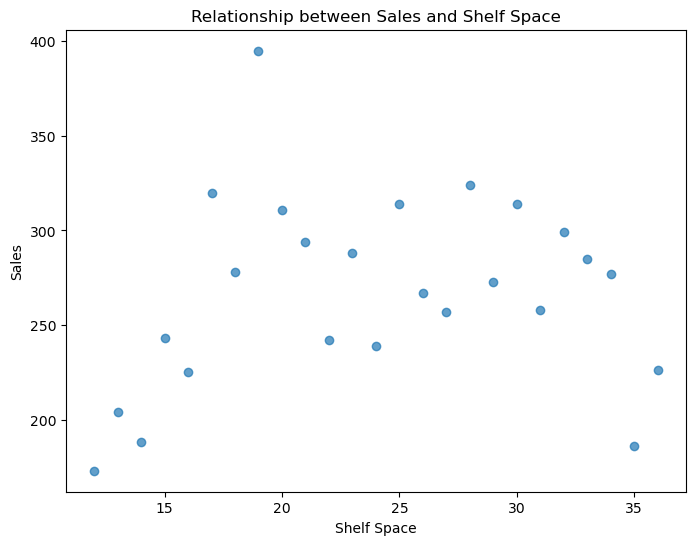

Correlation coefficient: 0.1645890610107954
The data suggests a positive correlation.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data from the Excel file
data = pd.read_excel("data.xlsx")

# Extract the "Sales" and "Space" columns
sales = data["Sales"]
space = data["Space"]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(space, sales, alpha=0.7)
plt.title("Relationship between Sales and Shelf Space")
plt.xlabel("Shelf Space")
plt.ylabel("Sales")

# Show the plot
plt.show()

# Calculate the correlation coefficient
correlation = sales.corr(space)
print(f"Correlation coefficient: {correlation}")

# Assess the manager's intuition based on the plot and correlation coefficient
if correlation > 0:
    print("The data suggests a positive correlation.")
elif correlation < 0:
    print("The data suggests a negative correlation.")
else:
    print("The data suggests no significant correlation.")


In [8]:
import pandas as pd
import statsmodels.api as sm

# Load your data from the Excel file
data = pd.read_excel("data.xlsx")

# Create the new variable Space-sq (the square of Space)
data['Space-sq'] = data['Space'] ** 2

# Define the independent variables (predictors) and the dependent variable (target)
X = data[['Space', 'Space-sq']]
y = data['Sales']

# Add a constant term to the independent variables (intercept)
X = sm.add_constant(X)

# Fit the quadratic regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     7.542
Date:                Thu, 21 Sep 2023   Prob (F-statistic):            0.00320
Time:                        15:54:58   Log-Likelihood:                -126.80
No. Observations:                  25   AIC:                             259.6
Df Residuals:                      22   BIC:                             263.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -108.9917     97.240     -1.121      0.2

In [9]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

# Load data from an Excel file
data = pd.read_excel("food.xlsx")

# Linear regression model
X_linear = sm.add_constant(data['Price'])
model_linear = sm.OLS(data['Sales'], X_linear).fit()

# Quadratic regression model
data['Price-sq'] = data['Price']**2
X_quadratic = sm.add_constant(data[['Price', 'Price-sq']])
model_quadratic = sm.OLS(data['Sales'], X_quadratic).fit()

# Print linear regression results
print("Linear Regression Results:")
print(model_linear.summary())

# Print quadratic regression results
print("\nQuadratic Regression Results:")
print(model_quadratic.summary())


Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     106.4
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           5.51e-09
Time:                        15:54:58   Log-Likelihood:                -79.065
No. Observations:                  20   AIC:                             162.1
Df Residuals:                      18   BIC:                             164.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        453.5555    

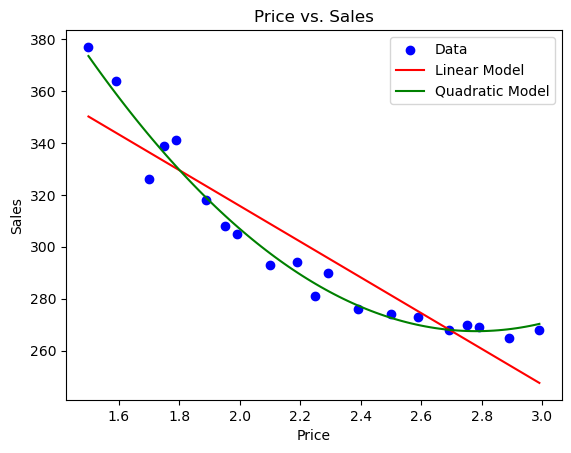

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

# Load data from an Excel file
data = pd.read_excel("food.xlsx")

# Linear regression model
X_linear = sm.add_constant(data['Price'])
model_linear = sm.OLS(data['Sales'], X_linear).fit()

# Quadratic regression model
data['Price-sq'] = data['Price']**2
X_quadratic = sm.add_constant(data[['Price', 'Price-sq']])
model_quadratic = sm.OLS(data['Sales'], X_quadratic).fit()

# Create a range of prices for the plot
price_range = np.linspace(data['Price'].min(), data['Price'].max(), 100)

# Predictions for linear and quadratic models
linear_predictions = model_linear.predict(sm.add_constant(price_range))
quadratic_predictions = model_quadratic.predict(sm.add_constant(np.column_stack((price_range, price_range**2))))

# Create scatterplot of data points
plt.scatter(data['Price'], data['Sales'], label='Data', color='blue')

# Plot the linear regression line
plt.plot(price_range, linear_predictions, label='Linear Model', color='red')

# Plot the quadratic regression curve
plt.plot(price_range, quadratic_predictions, label='Quadratic Model', color='green')

# Add labels and a legend
plt.xlabel('Price')
plt.ylabel('Sales')
plt.legend()

# Show the plot
plt.title('Price vs. Sales')
plt.show()


In [13]:

# Load data from an Excel file
data = pd.read_excel("df.xlsx")

In [15]:
data

,Income A,Sales A,Income B,Sales B,Income C,Sales C,Income D,Sales D
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the Excel data into a pandas DataFrame
df = pd.read_excel('df.xlsx')

# Separate income and sales columns
income_columns = [col for col in df.columns if col.startswith('Income')]
sales_columns = [col for col in df.columns if col.startswith('Sales')]

# Perform linear regression for each pair of income and sales columns
for income_col, sales_col in zip(income_columns, sales_columns):
    X = df[[income_col]]  # Independent variable (Income)
    y = df[sales_col]     # Dependent variable (Sales)

    # Create a LinearRegression model
    model = LinearRegression()

    # Fit the model to the data
    model.fit(X, y)

    # Print the results
    print(f"Regression for {income_col} and {sales_col}:")
    print(f"Coefficient (slope): {model.coef_[0]}")
    print(f"Intercept: {model.intercept_}")
    print(f"R-squared value: {model.score(X, y)}")
    print("\n")


Regression for Income A and Sales A:
Coefficient (slope): 0.5000909090909091
Intercept: 3.0000909090909103
R-squared value: 0.666542459508775


Regression for Income B and Sales B:
Coefficient (slope): 0.5000000000000001
Intercept: 3.000909090909089
R-squared value: 0.6662420337274844


Regression for Income C and Sales C:
Coefficient (slope): 0.4997272727272728
Intercept: 3.002454545454545
R-squared value: 0.6663240410665592


Regression for Income D and Sales D:
Coefficient (slope): 0.4999090909090909
Intercept: 3.0017272727272726
R-squared value: 0.6667072568984653




In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load the Excel data into a pandas DataFrame
df = pd.read_excel('df.xlsx')

# Separate income and sales columns
income_columns = [col for col in df.columns if col.startswith('Income')]
sales_columns = [col for col in df.columns if col.startswith('Sales')]

# Perform linear regression for each pair of income and sales columns
for income_col, sales_col in zip(income_columns, sales_columns):
    X = df[[income_col]]  # Independent variable (Income)
    y = df[sales_col]     # Dependent variable (Sales)

    # Add a constant term to the independent variable for the intercept
    X = sm.add_constant(X)

    # Create a LinearRegression model
    model = sm.OLS(y, X).fit()

    # Print the results
    print(f"Regression for {income_col} and {sales_col}:")
    print(f"Coefficient (slope): {model.params[income_col]}")
    print(f"Intercept: {model.params['const']}")
    print(f"R-squared value: {model.rsquared}")
    print(f"P-value for {income_col}: {model.pvalues[income_col]}")
    print("\n")


Regression for Income A and Sales A:
Coefficient (slope): 0.5000909090909091
Intercept: 3.0000909090909085
R-squared value: 0.666542459508775
P-value for Income A: 0.002169628873078794


Regression for Income B and Sales B:
Coefficient (slope): 0.5
Intercept: 3.0009090909090905
R-squared value: 0.6662420337274844
P-value for Income B: 0.0021788162369108005


Regression for Income C and Sales C:
Coefficient (slope): 0.49972727272727285
Intercept: 3.0024545454545453
R-squared value: 0.6663240410665593
P-value for Income C: 0.002176305279228019


Regression for Income D and Sales D:
Coefficient (slope): 0.49990909090909075
Intercept: 3.0017272727272752
R-squared value: 0.6667072568984653
P-value for Income D: 0.00216460234719722




/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


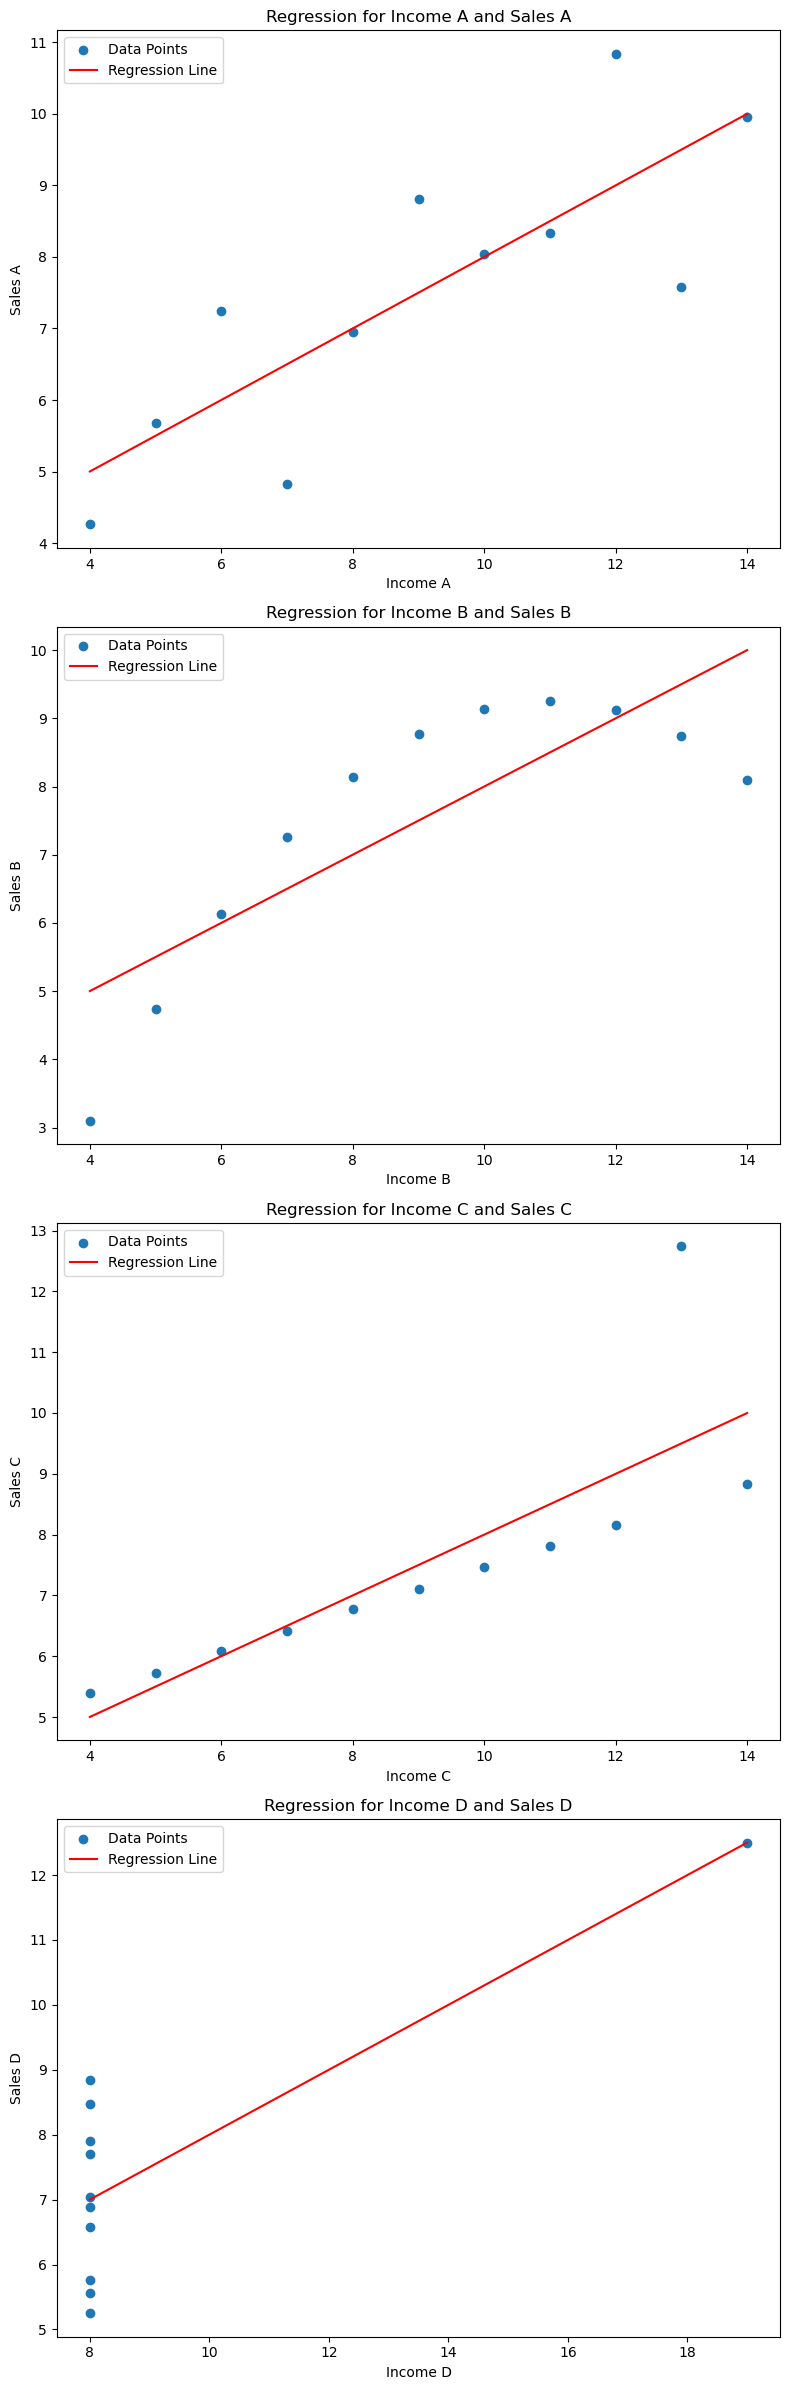

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the Excel data into a pandas DataFrame
df = pd.read_excel('df.xlsx')

# Separate income and sales columns
income_columns = [col for col in df.columns if col.startswith('Income')]
sales_columns = [col for col in df.columns if col.startswith('Sales')]

# Create subplots for each regression
fig, axes = plt.subplots(len(income_columns), 1, figsize=(8, 6 * len(income_columns)))

for idx, (income_col, sales_col) in enumerate(zip(income_columns, sales_columns)):
    X = df[[income_col]]  # Independent variable (Income)
    y = df[sales_col]     # Dependent variable (Sales)

    # Create a LinearRegression model
    model = LinearRegression()

    # Fit the model to the data
    model.fit(X, y)

    # Plot the data points
    axes[idx].scatter(X, y, label='Data Points')

    # Plot the regression line
    x_range = np.linspace(X.min(), X.max(), 100)
    y_pred = model.predict(x_range.reshape(-1, 1))
    axes[idx].plot(x_range, y_pred, color='red', label='Regression Line')

    # Set labels and title for the subplot
    axes[idx].set_xlabel(income_col)
    axes[idx].set_ylabel(sales_col)
    axes[idx].set_title(f'Regression for {income_col} and {sales_col}')
    axes[idx].legend()

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


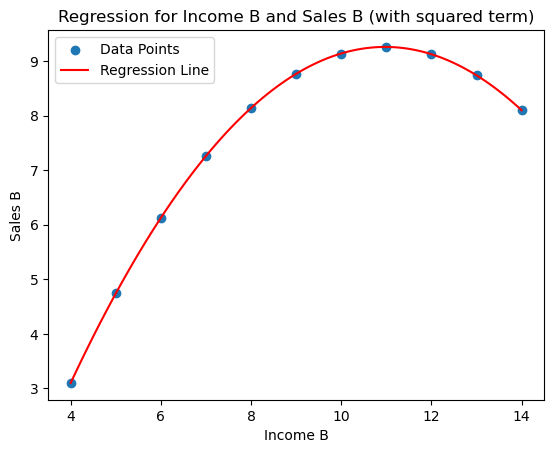

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the Excel data into a pandas DataFrame
df = pd.read_excel('df.xlsx')

# Extract the data for the second model (Income B vs. Sales B)
X = df[['Income B']]  # Independent variable (Income B)
y = df['Sales B']     # Dependent variable (Sales B)

# Create a squared term for Income B
X_squared = X ** 2

# Concatenate the squared term with the original income column
X_extended = pd.concat([X, X_squared], axis=1)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X_extended, y)

# Plot the data points
plt.scatter(X, y, label='Data Points')

# Plot the regression line
x_range = np.linspace(X.min(), X.max(), 100)
x_range_squared = x_range ** 2
X_range_extended = pd.concat([pd.DataFrame(x_range), pd.DataFrame(x_range_squared)], axis=1)
y_pred = model.predict(X_range_extended)
plt.plot(x_range, y_pred, color='red', label='Regression Line')

# Set labels and title for the plot
plt.xlabel('Income B')
plt.ylabel('Sales B')
plt.title('Regression for Income B and Sales B (with squared term)')
plt.legend()

# Show the plot
plt.show()


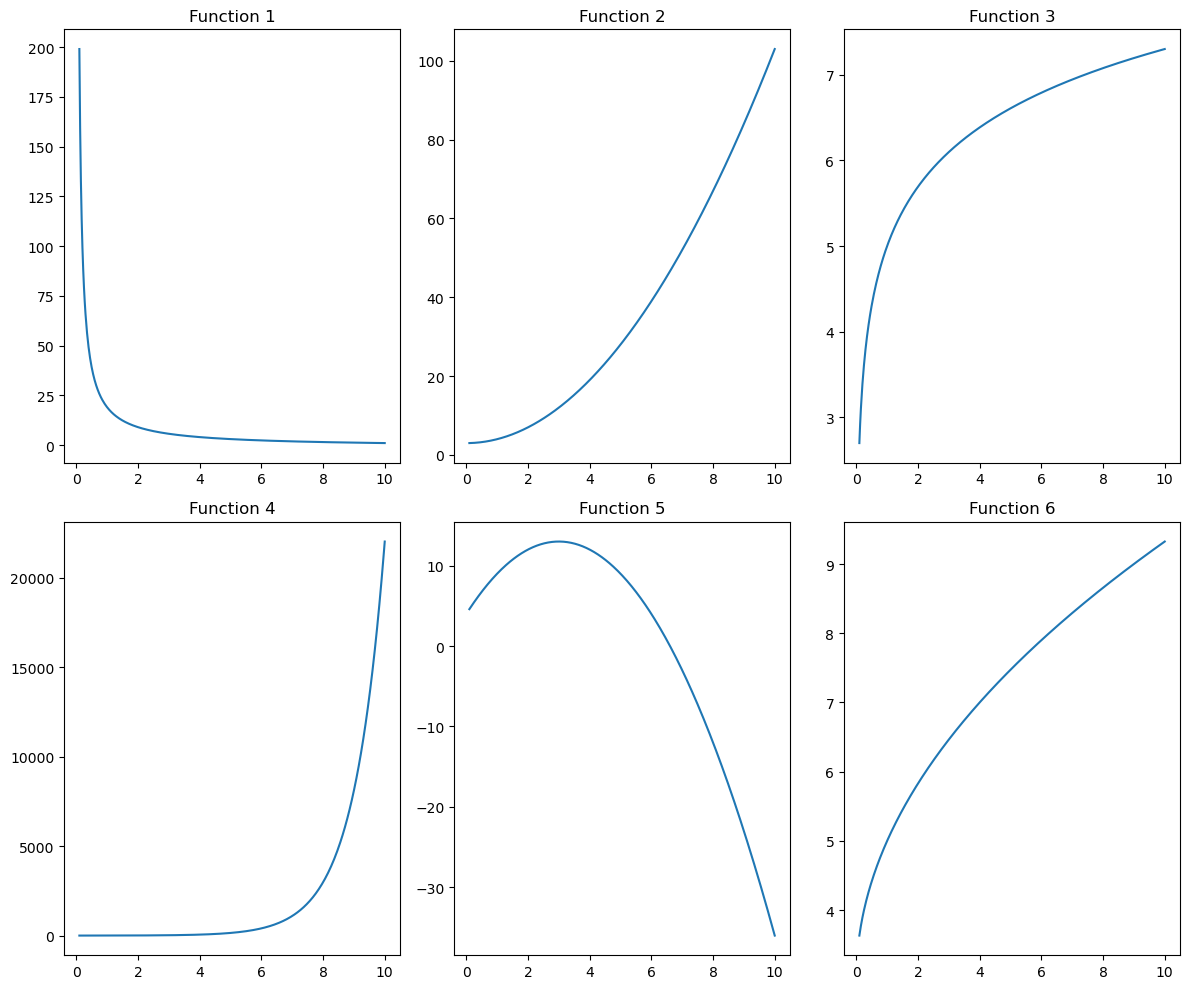

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values
x = np.linspace(0.1, 10, 400)  # Avoid x = 0 for log and division operations

# Define the functions
y1 = 20 / x - 1
y2 = 3 + x**2
y3 = 5 + np.log(x)
y4 = 3 + np.exp(x)
y5 = 4 + 6 * x - x**2
y6 = 3 + 2 * np.sqrt(x)

# Create subplots for each function
plt.figure(figsize=(12, 10))

# Function 1
plt.subplot(231)
plt.plot(x, y1, label='y = 20/x - 1')
plt.title('Function 1')

# Function 2
plt.subplot(232)
plt.plot(x, y2, label='y = 3 + e^2')
plt.title('Function 2')

# Function 3
plt.subplot(233)
plt.plot(x, y3, label='y = 5 + log(x)')
plt.title('Function 3')

# Function 4
plt.subplot(234)
plt.plot(x, y4, label='y = 3 + e^x')
plt.title('Function 4')

# Function 5
plt.subplot(235)
plt.plot(x, y5, label='y = 4 + 6x - x^2')
plt.title('Function 5')

# Function 6
plt.subplot(236)
plt.plot(x, y6, label='y = 3 + 2sqrt(x)')
plt.title('Function 6')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()




In [29]:
import pandas as pd

# Read the Excel file into a DataFrame
file_name = "Winner_data.xlsx"
df = pd.read_excel(file_name)

# Filter the DataFrame to include only male employees
male_employees = df[df['Gender'] == 0]

# Calculate the average experience level for male employees
average_experience_male = male_employees['Experience'].mean()

print(f"The average experience level for male employees is: {average_experience_male:.2f}")


/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


The average experience level for male employees is: 21.12


In [31]:
# Filter the DataFrame to include only female employees
female_employees = df[df['Gender'] == 1]

# Calculate the average experience level for female employees
average_experience_female = female_employees['Experience'].mean()

print(f"The average experience level for female employees is: {average_experience_female:.2f}")


The average experience level for female employees is: 7.38


In [32]:
# Filter the DataFrame to include only male employees
male_employees = df[df['Gender'] == 0]

# Calculate the average experience level for male employees
average_experience_male = male_employees['Experience'].mean()

# Calculate the standard error of the mean
std_error = stats.sem(male_employees['Experience'])

# Set the confidence level (95%)
confidence_level = 0.95

# Calculate the margin of error
margin_of_error = std_error * stats.t.ppf((1 + confidence_level) / 2, len(male_employees) - 1)

# Calculate the confidence interval
lower_bound = average_experience_male - margin_of_error
upper_bound = average_experience_male + margin_of_error

print(f"95% Confidence Interval for the average experience of male employees: ({lower_bound:.2f}, {upper_bound:.2f})")


95% Confidence Interval for the average experience of male employees: (16.52, 25.73)


In [34]:
# Filter the DataFrame to include only female employees
female_employees = df[df['Gender'] == 1]

# Calculate the average experience level for female employees
average_experience_female = female_employees['Experience'].mean()

# Calculate the standard error of the mean
std_error = stats.sem(female_employees['Experience'])

# Set the confidence level (95%)
confidence_level = 0.95

# Calculate the margin of error
margin_of_error = std_error * stats.t.ppf((1 + confidence_level) / 2, len(female_employees) - 1)

# Calculate the confidence interval
lower_bound = average_experience_female - margin_of_error
upper_bound = average_experience_female + margin_of_error

print(f"95% Confidence Interval for the average experience of female employees: ({lower_bound:.2f}, {upper_bound:.2f})")

95% Confidence Interval for the average experience of female employees: (3.95, 10.82)


In [36]:
df

,Employee Number,Gender,Experience,Salary
0,1,0,16,79400
1,2,0,25,67400
2,3,0,15,66500
3,4,0,33,72600
4,5,0,16,63600
5,6,0,19,74500
6,7,0,32,76400
7,8,0,34,67900
8,9,0,1,61600
9,10,0,44,75500


In [42]:

# Define the independent variable (experience) and dependent variable (salary)
X = df['Experience']
y = df['Salary']

# Add a constant term to the independent variable (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the regression coefficients
intercept, slope = model.params['const'], model.params['Experience']

# Perform hypothesis testing to check if the slope is significant
p_value = model.pvalues['Experience']

# Calculate the impact of one additional year of experience on average compensation
impact = slope

# Calculate the 95% confidence interval for the impact
confidence_interval = model.conf_int(alpha=0.05)

print(f"Regression Coefficients:")
print(f"Intercept: {intercept:.2f}")
print(f"Slope (Experience): {slope:.2f}")
print(f"P-value: {p_value:.5f}")
print(f"Impact of one additional year of experience on average compensation: {impact:.2f}")

# Print the 95% confidence interval
print(f"95% Confidence Interval for the impact of experience:")
print(f"Lower Bound: {confidence_interval.iloc[1, 0]:.2f}")
print(f"Upper Bound: {confidence_interval.iloc[1, 1]:.2f}")


Regression Coefficients:
Intercept: 58704.76
Slope (Experience): 566.47
P-value: 0.00000
Impact of one additional year of experience on average compensation: 566.47
95% Confidence Interval for the impact of experience:
Lower Bound: 444.52
Upper Bound: 688.42


In [44]:
import pandas as pd
import statsmodels.api as sm

# Define the independent variables (experience and gender)
X = df[['Experience', 'Gender']]

# Add a constant term to the independent variables (intercept)
X = sm.add_constant(X)

# Define the dependent variable (salary)
y = df['Salary']

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary table of regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     43.14
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           2.30e-11
Time:                        12:36:53   Log-Likelihood:                -496.03
No. Observations:                  50   AIC:                             998.1
Df Residuals:                      47   BIC:                             1004.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.956e+04   1897.914     31.380      0.0

In [82]:
# Step 2: Transform the 'Experience' column to its square root
df['Sqrt_Experience'] = np.sqrt(df['Experience'])

# Step 3: Fit the nonlinear regression model
X = sm.add_constant(df['Sqrt_Experience'])
model = sm.OLS(df['Salary'], X).fit()

# Step 5: Get the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     136.8
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           1.18e-15
Time:                        13:36:02   Log-Likelihood:                -488.39
No. Observations:                  50   AIC:                             980.8
Df Residuals:                      48   BIC:                             984.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.476e+04   1183.578     

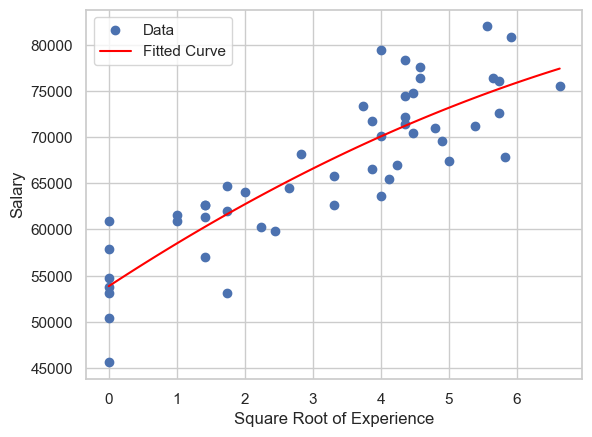

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define a custom nonlinear function (for example, a simple quadratic function)
def custom_function(x, a, b, c):
    return a * x**2 + b * x + c

# Transform the 'Experience' column to its square root
df['Sqrt_Experience'] = np.sqrt(df['Experience'])

# Fit the custom nonlinear model to the data
popt, _ = curve_fit(custom_function, df['Sqrt_Experience'], df['Salary'])

# Generate values for the fitted curve
x_range = np.linspace(df['Sqrt_Experience'].min(), df['Sqrt_Experience'].max(), 100)
y_pred = custom_function(x_range, *popt)

# Create a scatter plot of the data points
plt.scatter(df['Sqrt_Experience'], df['Salary'], label='Data')

# Plot the fitted curve
plt.plot(x_range, y_pred, color='red', label='Fitted Curve')

plt.xlabel('Square Root of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [84]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


# Transform the 'Experience' column to its square root
df['Sqrt_Experience'] = np.sqrt(df['Experience'])

# Fit the multiple regression model with both square root of experience and gender
X = sm.add_constant(df[['Sqrt_Experience', 'Gender']])  # Assuming 'Gender' is already a dummy variable
model = sm.OLS(df['Salary'], X).fit()

# Get the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     66.98
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           1.74e-14
Time:                        13:40:46   Log-Likelihood:                -488.39
No. Observations:                  50   AIC:                             982.8
Df Residuals:                      47   BIC:                             988.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.469e+04   1960.892     

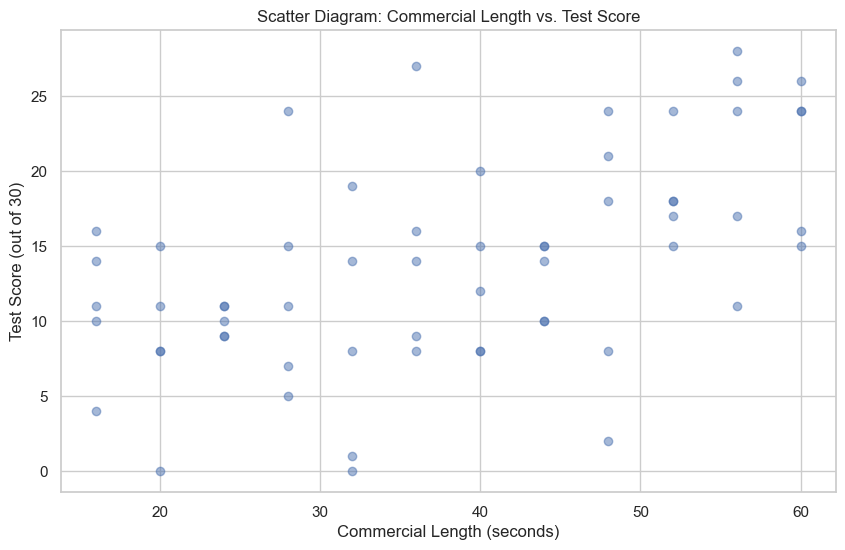

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
df = pd.read_excel('commercials.xlsx')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Length'], df['Test'], alpha=0.5)
plt.xlabel('Commercial Length (seconds)')
plt.ylabel('Test Score (out of 30)')
plt.title('Scatter Diagram: Commercial Length vs. Test Score')
plt.grid(True)
plt.show()


In [86]:
import statsmodels.api as sm

# Add a constant term to the independent variable
X = sm.add_constant(df['Length'])
y = df['Test']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Test   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     23.61
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           9.35e-06
Time:                        15:21:18   Log-Likelihood:                -190.50
No. Observations:                  60   AIC:                             385.0
Df Residuals:                      58   BIC:                             389.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6357      2.226      1.633      0.1

In [104]:
import pandas as pd
import statsmodels.api as sm

# Load the data from the Excel file
df = pd.read_excel('advertising.xlsx')

# Step 1: Fit the regression model
X = df[['Direct', 'Newspaper', 'Television']]
X = sm.add_constant(X)  # Add a constant term (intercept)
y = df['Sales']

model = sm.OLS(y, X).fit()

# Step 2: Get regression equation
print("Regression Equation:")
print(model.summary())

# Step 3: Get R-squared and Adjusted R-squared
r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj

print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")

# Step 4: Interpret R-squared and Adjusted R-squared
print("\nInterpretation of R-squared and Adjusted R-squared:")
print("R-squared measures the proportion of variance in the dependent variable (Sales) that is explained by the independent variables (Direct, Newspaper, Television).")
print("Adjusted R-squared adjusts for the number of predictors. A higher value indicates a better fit. In this case, we want it to be close to 1.")

# Step 5: Get the standard error of estimates
std_error = model.bse['const']

print(f"\nStandard Error of Estimates: {std_error:.4f}")
print("The standard error of estimates measures the standard deviation of the residuals (the difference between the observed and predicted values). It tells us how well the model fits the data.")

# Step 6: Check linear relationships of independent variables
corr_matrix = df.corr()
linear_relations = [col for col in corr_matrix.columns if abs(corr_matrix.loc['Sales', col]) > 0.2]

print("\nIndependent variables with a linear relationship to Sales:")
print(linear_relations)
print("Variables with a correlation coefficient greater than 0.2 or less than -0.2 are considered to have a linear relationship with Sales.")

# Step 7: Compute a 95% confidence interval for gross sales
# Assuming expenditures of $800 on Direct, $1200 on Newspaper, and $2000 on Television
expenditures = [1, 0.8, 1.2, 2.0]  # Include the constant term (intercept)

sales_estimate = model.predict(expenditures)[0]
confidence_interval = model.get_prediction(expenditures).conf_int(alpha=0.05)

print(f"\nEstimated Weekly Gross Sales: ${sales_estimate * 1000:.2f}")
print("95% Confidence Interval for Weekly Gross Sales (in thousands of dollars):")
print(f"Lower Bound: ${confidence_interval[0][0] * 1000:.2f}")
print(f"Upper Bound: ${confidence_interval[0][1] * 1000:.2f}")


Regression Equation:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     1.698
Date:                Tue, 26 Sep 2023   Prob (F-statistic):              0.198
Time:                        16:13:40   Log-Likelihood:                -57.058
No. Observations:                  25   AIC:                             122.1
Df Residuals:                      21   BIC:                             127.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3084      4.69

/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


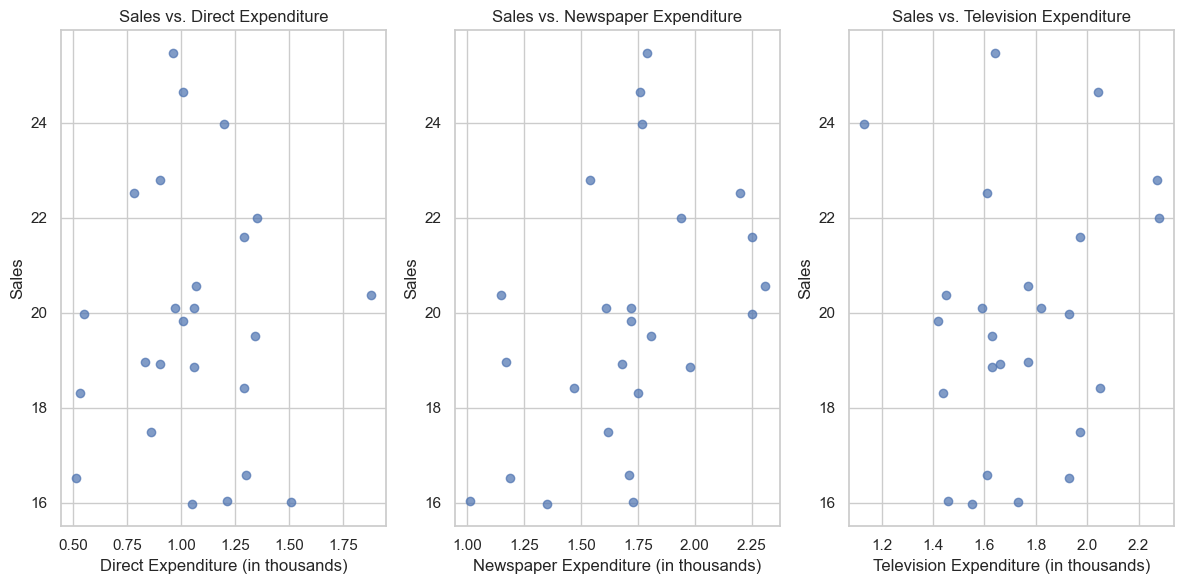

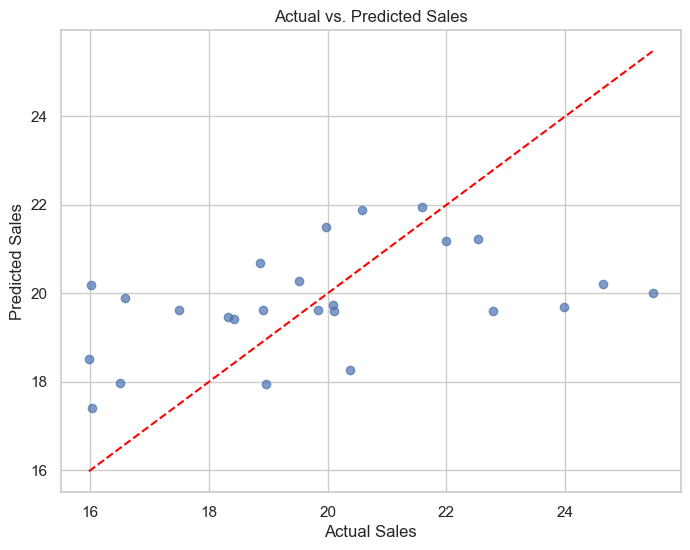

In [88]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the Excel file
df = pd.read_excel('advertising.xlsx')

# Fit the regression model
X = df[['Direct', 'Newspaper', 'Television']]
X = sm.add_constant(X)  # Add a constant term (intercept)
y = df['Sales']

model = sm.OLS(y, X).fit()

# Scatter plot of Sales vs. Direct
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.scatter(df['Direct'], df['Sales'], alpha=0.7)
plt.xlabel('Direct Expenditure (in thousands)')
plt.ylabel('Sales')
plt.title('Sales vs. Direct Expenditure')

# Scatter plot of Sales vs. Newspaper
plt.subplot(132)
plt.scatter(df['Newspaper'], df['Sales'], alpha=0.7)
plt.xlabel('Newspaper Expenditure (in thousands)')
plt.ylabel('Sales')
plt.title('Sales vs. Newspaper Expenditure')

# Scatter plot of Sales vs. Television
plt.subplot(133)
plt.scatter(df['Television'], df['Sales'], alpha=0.7)
plt.xlabel('Television Expenditure (in thousands)')
plt.ylabel('Sales')
plt.title('Sales vs. Television Expenditure')

plt.tight_layout()

# Plot the regression fit
plt.figure(figsize=(8, 6))
plt.scatter(df['Sales'], model.fittedvalues, alpha=0.7)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red')
plt.grid(True)

plt.show()


In [89]:
import pandas as pd

# Load the data from the Excel file
df = pd.read_excel('advertising.xlsx')

# Calculate the correlation matrix
correlation_matrix = df[['Direct', 'Newspaper', 'Television']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Correlation Matrix:
              Direct  Newspaper  Television
Direct      1.000000  -0.137635   -0.124609
Newspaper  -0.137635   1.000000    0.146750
Television -0.124609   0.146750    1.000000


In [100]:
import pandas as pd

# Load the data from the Excel file
df = pd.read_excel('newspapers.xlsx')

# Display the first few rows of the dataset to understand its structure
print(df.head())


   Paper    Sub  Popul   Adv  Income
0      1  37.95  588.9  13.2    35.1
1      2  37.66  585.3  13.2    34.7
2      3  37.55  566.3  19.8    34.8
3      4  38.78  642.9  17.6    35.1
4      5  37.67  624.2  17.6    34.6


In [101]:
import statsmodels.api as sm

# Fit the multiple linear regression model
X = sm.add_constant(df[['Popul', 'Adv', 'Income']])
y = df['Sub']

model = sm.OLS(y, X).fit()

# Get regression equation and summary
print("Regression Equation:")
print(model.summary())


Regression Equation:
                            OLS Regression Results                            
Dep. Variable:                    Sub   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     35.38
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           2.14e-08
Time:                        15:55:16   Log-Likelihood:                -5.3440
No. Observations:                  25   AIC:                             18.69
Df Residuals:                      21   BIC:                             23.56
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7328      8.42

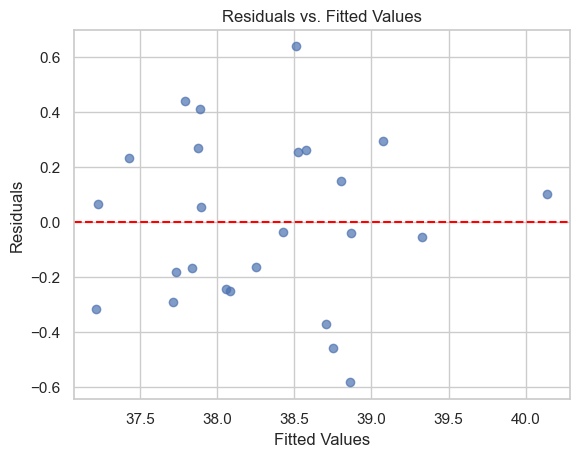

In [102]:
import matplotlib.pyplot as plt

# Scatterplot of residuals vs. fitted values
plt.scatter(model.fittedvalues, model.resid, alpha=0.7)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()


In [106]:
import pandas as pd
import statsmodels.api as sm

# Load the data from the Excel file
df = pd.read_excel('advertising.xlsx')

# Fit the regression model
X = df[['Direct', 'Newspaper', 'Television']]
X = sm.add_constant(X)  # Add a constant term (intercept)
y = df['Sales']

model = sm.OLS(y, X).fit()

# Calculate the standard error of the estimate
standard_error_estimate = (model.scale) ** 0.5

print(f"Standard Error of the Estimate: {standard_error_estimate:.4f}")


Standard Error of the Estimate: 2.5871


/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [107]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load the data from the Excel file
df = pd.read_excel('advertising.xlsx')

# Fit the regression model
X = df[['Direct', 'Newspaper', 'Television']]
X = sm.add_constant(X)  # Add a constant term (intercept)
y = df['Sales']

model = sm.OLS(y, X).fit()

# Calculate the residuals
residuals = y - model.fittedvalues

# Calculate the RMSE (standard error of the estimate)
rmse = np.sqrt((residuals ** 2).mean())

# Define the expenditure values for prediction
expenditures = [1, 0.8, 1.2, 2.0]  # Include the constant term (intercept)

# Calculate the standard error of the prediction (standard error of the estimate)
std_error_estimate = rmse * np.sqrt(1 + np.dot(expenditures, np.linalg.inv(np.dot(X.T, X)).dot(expenditures)))

# Calculate the predicted sales estimate
sales_estimate = model.predict(expenditures)[0]

# Calculate the margin of error for the confidence interval
margin_of_error = 1.96 * std_error_estimate  # Assuming a 95% confidence interval

# Calculate the lower and upper bounds of the confidence interval
lower_bound = sales_estimate - margin_of_error
upper_bound = sales_estimate + margin_of_error

print(f"Estimated Weekly Gross Sales: ${sales_estimate * 1000:.2f}")
print("95% Confidence Interval for Weekly Gross Sales (in thousands of dollars):")
print(f"Lower Bound: ${lower_bound * 1000:.2f}")
print(f"Upper Bound: ${upper_bound * 1000:.2f}")


Estimated Weekly Gross Sales: $18212.66
95% Confidence Interval for Weekly Gross Sales (in thousands of dollars):
Lower Bound: $13082.20
Upper Bound: $23343.13


/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
